In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
df = pd.read_csv('./Downloads/Bitcoin Historical Data - Investing.com India.csv', header=0)


In [3]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,Jun 23,"26,931.0","27,216.4","27,410.2","24,838.0",1.06M,-1.05%
1,May 23,"27,216.1","29,252.1","29,816.4","25,853.1",1.66M,-6.96%
2,Apr 23,"29,252.1","28,473.7","30,964.9","27,054.3",2.03M,2.73%
3,Mar 23,"28,473.7","23,130.6","29,160.4","19,591.8",10.26M,23.10%
4,Feb 23,"23,130.5","23,124.7","25,236.8","21,418.7",9.09M,0.02%
5,Jan 23,"23,125.1","16,537.5","23,952.9","16,499.7",8.98M,39.83%
6,Dec 22,"16,537.4","17,163.4","18,351.8","16,331.2",6.61M,-3.65%
7,Nov 22,"17,163.9","20,496.1","21,464.7","15,504.2",10.30M,-16.26%
8,Oct 22,"20,496.3","19,422.9","21,038.1","18,207.9",8.29M,5.53%
9,Sep 22,"19,423.0","20,049.9","22,702.5","18,191.8",10.91M,-3.10%


In [4]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      155 non-null    object
 1   Price     155 non-null    object
 2   Open      155 non-null    object
 3   High      155 non-null    object
 4   Low       155 non-null    object
 5   Vol.      155 non-null    object
 6   Change %  155 non-null    object
dtypes: object(7)
memory usage: 8.6+ KB


In [6]:
df.shape 

(155, 7)

In [7]:
df.rename({'Vol.': 'Volume'}, inplace = True, axis=1)

In [8]:
df.head()

,Date,Price,Open,High,Low,Volume,Change %
0,Jun 23,"26,931.0","27,216.4","27,410.2","24,838.0",1.06M,-1.05%
1,May 23,"27,216.1","29,252.1","29,816.4","25,853.1",1.66M,-6.96%
2,Apr 23,"29,252.1","28,473.7","30,964.9","27,054.3",2.03M,2.73%
3,Mar 23,"28,473.7","23,130.6","29,160.4","19,591.8",10.26M,23.10%
4,Feb 23,"23,130.5","23,124.7","25,236.8","21,418.7",9.09M,0.02%


In [9]:
df['Price'] = df['Price'].str.replace(',', '')
df['Open'] = df['Open'].str.replace(',', '')
df['High'] = df['High'].str.replace(',', '')
df['Low'] = df['Low'].str.replace(',', '')
df['Change %'] = df['Change %'].str.replace('%', '')

In [10]:
df = df.copy()
df

,Date,Price,Open,High,Low,Volume,Change %
0,Jun 23,26931.0,27216.4,27410.2,24838.0,1.06M,-1.05
1,May 23,27216.1,29252.1,29816.4,25853.1,1.66M,-6.96
2,Apr 23,29252.1,28473.7,30964.9,27054.3,2.03M,2.73
3,Mar 23,28473.7,23130.6,29160.4,19591.8,10.26M,23.10
4,Feb 23,23130.5,23124.7,25236.8,21418.7,9.09M,0.02
...,...,...,...,...,...,...,...
150,Dec 10,0.3,0.2,0.3,0.2,263.65K,44.09
151,Nov 10,0.2,0.2,0.5,0.1,826.25K,0.00
152,Oct 10,0.2,0.1,0.2,0.0,1.11M,210.99
153,Sep 10,0.1,0.1,0.2,0.1,216.81K,0.00


In [11]:
## Replacing the M, B, K in the values and converting to float data types
new_array = []
for value in df['Volume']: 
    if value[-1] == 'M':
        value = value.replace(value[-1], '')
        value = float(value) * 100000
        new_array.append(value)
    elif value[-1] == 'B':
        value = value.replace(value[-1], '')
        value = float(value) * 1000000000
        new_array.append(value)
    else: 
        value = value.replace(value[-1], '')
        value = float(value) * 1000
        new_array.append(value)

len(new_array)


155

In [12]:
df['Volume'] = new_array

df['Volume'].head(20)

0     1.060000e+05
1     1.660000e+05
2     2.030000e+05
3     1.026000e+06
4     9.090000e+05
5     8.980000e+05
6     6.610000e+05
7     1.030000e+06
8     8.290000e+05
9     1.091000e+06
10    6.550000e+05
11    5.790000e+05
12    3.790000e+05
13    4.670000e+09
14    1.214000e+10
15    4.370000e+10
16    1.820000e+05
17    2.030000e+05
18    1.900000e+05
19    1.850000e+05
Name: Volume, dtype: float64

In [13]:
## Changing from string datatype to numeric 
df['Price'] = pd.to_numeric(df['Price'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Open'] = pd.to_numeric(df['Open'])
df['Change %'] = pd.to_numeric(df['Change %'])

In [14]:
df

,Date,Price,Open,High,Low,Volume,Change %
0,Jun 23,26931.0,27216.4,27410.2,24838.0,106000.0,-1.05
1,May 23,27216.1,29252.1,29816.4,25853.1,166000.0,-6.96
2,Apr 23,29252.1,28473.7,30964.9,27054.3,203000.0,2.73
3,Mar 23,28473.7,23130.6,29160.4,19591.8,1026000.0,23.10
4,Feb 23,23130.5,23124.7,25236.8,21418.7,909000.0,0.02
...,...,...,...,...,...,...,...
150,Dec 10,0.3,0.2,0.3,0.2,263650.0,44.09
151,Nov 10,0.2,0.2,0.5,0.1,826250.0,0.00
152,Oct 10,0.2,0.1,0.2,0.0,111000.0,210.99
153,Sep 10,0.1,0.1,0.2,0.1,216810.0,0.00


In [15]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
dtype: object

In [16]:
df.set_index('Date', inplace = True)

In [17]:
df

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
Jun 23,26931.0,27216.4,27410.2,24838.0,106000.0,-1.05
May 23,27216.1,29252.1,29816.4,25853.1,166000.0,-6.96
Apr 23,29252.1,28473.7,30964.9,27054.3,203000.0,2.73
Mar 23,28473.7,23130.6,29160.4,19591.8,1026000.0,23.10
Feb 23,23130.5,23124.7,25236.8,21418.7,909000.0,0.02
...,...,...,...,...,...,...
Dec 10,0.3,0.2,0.3,0.2,263650.0,44.09
Nov 10,0.2,0.2,0.5,0.1,826250.0,0.00
Oct 10,0.2,0.1,0.2,0.0,111000.0,210.99


In [18]:
df.tail(20)

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
Mar 12,4.9,4.9,5.4,4.3,176000.0,0.00
Feb 12,4.9,5.5,6.2,3.9,284000.0,-11.31
Jan 12,5.5,4.7,7.2,4.6,321000.0,16.10
Dec 11,4.7,3.0,5.0,2.6,190000.0,58.92
Nov 11,3.0,3.3,3.4,2.0,197000.0,-8.62
Oct 11,3.3,5.1,5.3,2.0,173000.0,-36.77
Sep 11,5.1,8.2,8.7,4.2,149000.0,-37.32
Aug 11,8.2,13.4,13.6,5.7,122000.0,-38.58
Jul 11,13.4,16.1,16.7,11.0,105000.0,-17.08


In [19]:
df.duplicated()

Date
Jun 23    False
May 23    False
Apr 23    False
Mar 23    False
Feb 23    False
          ...  
Dec 10    False
Nov 10    False
Oct 10    False
Sep 10    False
Aug 10    False
Length: 155, dtype: bool

In [20]:
df.isna().any()

Price       False
Open        False
High        False
Low         False
Volume      False
Change %    False
dtype: bool

In [21]:
df.describe()

,Price,Open,High,Low,Volume,Change %
count,155.000000,155.000000,155.000000,155.000000,1.550000e+02,155.000000
mean,9348.067097,9215.347742,10884.615484,7731.291613,3.913078e+08,15.924581
std,14591.849682,14555.344121,16996.547305,12094.010391,3.653094e+09,57.374728
min,0.100000,0.100000,0.100000,0.000000,8.575000e+04,-38.870000
25%,214.850000,176.550000,247.150000,115.500000,1.855000e+05,-8.045000
50%,1079.100000,965.500000,1239.900000,771.000000,3.450000e+05,2.820000
75%,10299.650000,10300.650000,12168.900000,9176.950000,8.739600e+05,25.845000
max,61309.600000,61310.100000,68990.600000,53448.300000,4.370000e+10,470.940000


In [22]:
df

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
Jun 23,26931.0,27216.4,27410.2,24838.0,106000.0,-1.05
May 23,27216.1,29252.1,29816.4,25853.1,166000.0,-6.96
Apr 23,29252.1,28473.7,30964.9,27054.3,203000.0,2.73
Mar 23,28473.7,23130.6,29160.4,19591.8,1026000.0,23.10
Feb 23,23130.5,23124.7,25236.8,21418.7,909000.0,0.02
...,...,...,...,...,...,...
Dec 10,0.3,0.2,0.3,0.2,263650.0,44.09
Nov 10,0.2,0.2,0.5,0.1,826250.0,0.00
Oct 10,0.2,0.1,0.2,0.0,111000.0,210.99


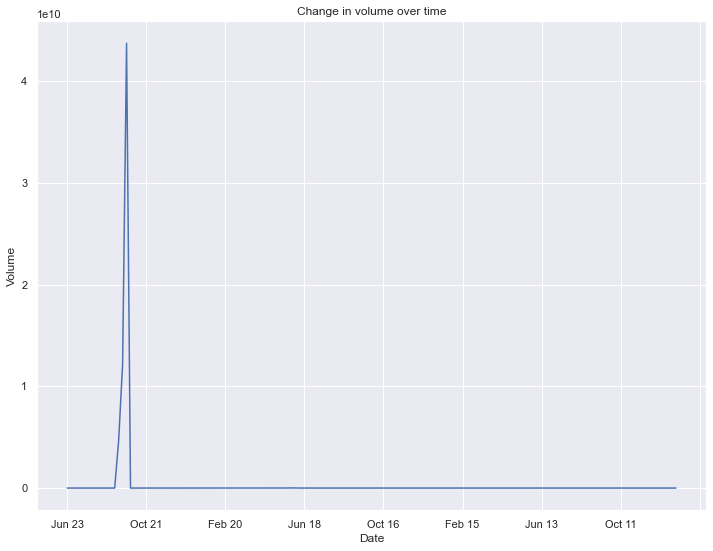

In [23]:
ax = df['Volume'].plot(kind='line', title = 'Change in volume over time', figsize = (12, 9))
ax.set_ylabel('Volume')
plt.show()

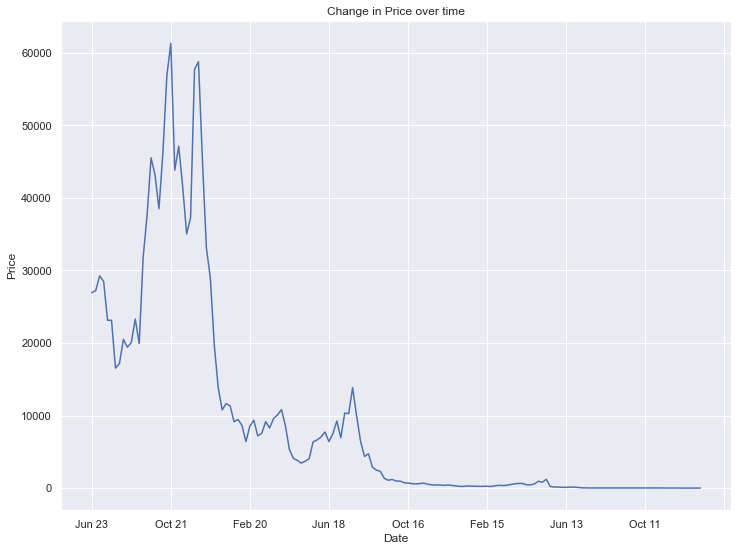

In [24]:
ax = df['Price'].plot(kind='line', title = 'Change in Price over time', figsize = (12, 9))
ax.set_ylabel('Price')
plt.show()

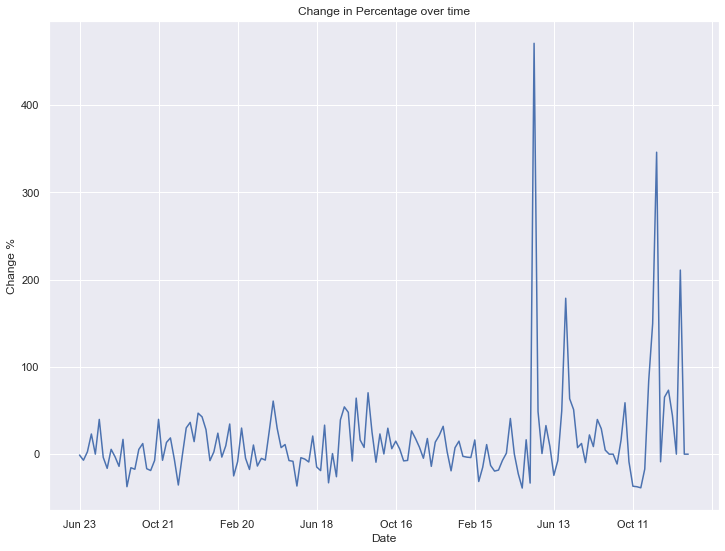

In [25]:
ax = df['Change %'].plot(kind='line', title = 'Change in Percentage over time', figsize = (12, 9))
ax.set_ylabel('Change %')
plt.show()

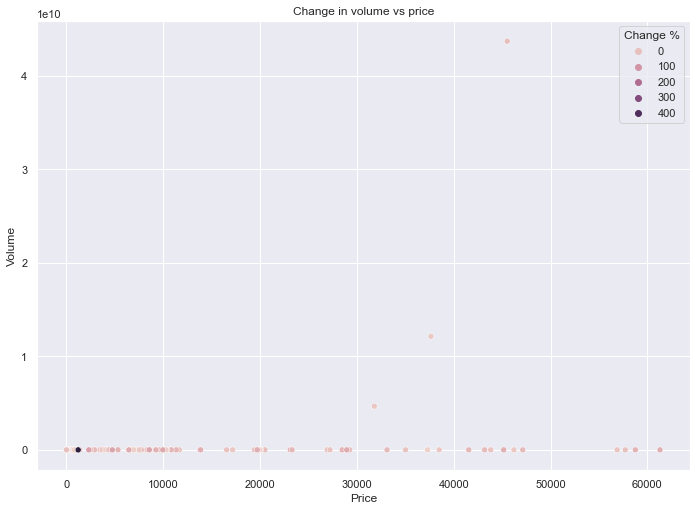

In [26]:
ax = sns.scatterplot(x = 'Price', y = 'Volume', hue ='Change %', data = df)
ax.set_title('Change in volume vs price')
plt.show()

In [27]:
df

,Price,Open,High,Low,Volume,Change %
Date,,,,,,
Jun 23,26931.0,27216.4,27410.2,24838.0,106000.0,-1.05
May 23,27216.1,29252.1,29816.4,25853.1,166000.0,-6.96
Apr 23,29252.1,28473.7,30964.9,27054.3,203000.0,2.73
Mar 23,28473.7,23130.6,29160.4,19591.8,1026000.0,23.10
Feb 23,23130.5,23124.7,25236.8,21418.7,909000.0,0.02
...,...,...,...,...,...,...
Dec 10,0.3,0.2,0.3,0.2,263650.0,44.09
Nov 10,0.2,0.2,0.5,0.1,826250.0,0.00
Oct 10,0.2,0.1,0.2,0.0,111000.0,210.99


In [28]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')

In [29]:
df[['Price', 'Volume', 'Change %', 'High', 'Low']].corr()

,Price,Volume,Change %,High,Low
Price,1.000000,0.247188,-0.101363,0.990850,0.990905
Volume,0.247188,1.000000,-0.031318,0.231150,0.255311
Change %,-0.101363,-0.031318,1.000000,-0.121193,-0.126974
High,0.990850,0.231150,-0.121193,1.000000,0.987618
Low,0.990905,0.255311,-0.126974,0.987618,1.000000


In [30]:
df_corr = df[['Price', 'Volume', 'Change %', 'High', 'Low']].corr()
df_corr

,Price,Volume,Change %,High,Low
Price,1.000000,0.247188,-0.101363,0.990850,0.990905
Volume,0.247188,1.000000,-0.031318,0.231150,0.255311
Change %,-0.101363,-0.031318,1.000000,-0.121193,-0.126974
High,0.990850,0.231150,-0.121193,1.000000,0.987618
Low,0.990905,0.255311,-0.126974,0.987618,1.000000


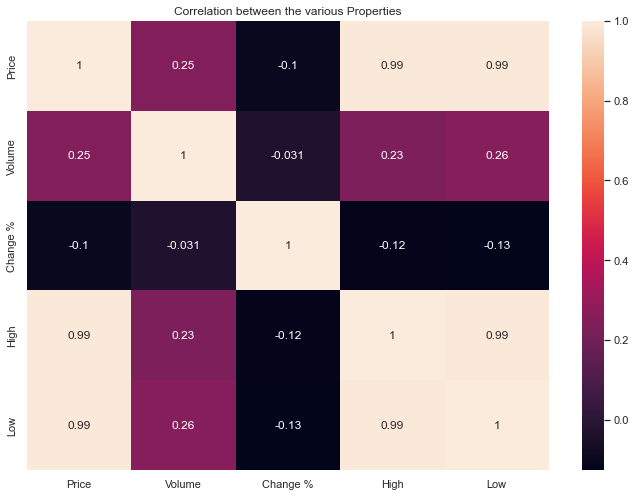

In [31]:
ax =  sns.heatmap(df_corr, annot=True)
ax.set_title('Correlation between the various Properties')
plt.show()